In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [3]:
batch_size = 32
learnning_rate = 1e-3
num_epochs = 50

In [9]:
train_dataset = datasets.MNIST('./datas', train=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./datas', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [5]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, in_dim, hidden1_dim, hidden2_dim, out_dim):
        super(NeuralNetwork, self).__init__()
        
        self.layer1 = nn.Linear(in_dim, hidden1_dim)
        self.layer2 = nn.Linear(hidden1_dim, hidden2_dim)
        self.layer3 = nn.Linear(hidden2_dim, out_dim)
        
    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

In [13]:
model = NeuralNetwork(28*28, 300, 200, 10).cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learnning_rate)

In [14]:
train_losses = []
train_acc = []

test_losses = []
test_acc = []

In [15]:
for epoch in range(num_epochs):
    running_loss = .0
    running_acc = .0
    for i, data in enumerate(train_loader, 1):
        img, label = data
        
        img = img.view(img.size(0), -1).cuda()
        label = label.cuda()
        
        out = model(img)
        loss = criterion(out, label)
        
        running_loss += loss.item() * batch_size
        
        _, pred = torch.max(out, 1)
        running_acc += (pred == label).sum().item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 500 == 0:
            print 'Epoch: [{}/{}], Loss: {:.6f}, Acc: {:.6f}'.format(epoch + 1, \
                                                                     num_epochs, \
                                                                     running_loss / (i*batch_size), \
                                                                     running_acc / (i*batch_size))
    print 'Finish {} Epoch, Loss: {:.6f}, Acc: {:.6f}'.format(epoch + 1, \
                                                              running_loss / len(train_dataset), \
                                                              running_acc / len(train_dataset))
    train_losses.append(running_loss / len(train_dataset))
    train_acc.append(running_acc / len(train_dataset))
    
    model.eval()
    eval_loss = .0
    eval_acc = .0
    for data in test_loader:
        img, label = data
        
        img = img.view(img.size(0), -1).cuda()
        label = label.cuda()
        
        out = model(img)
        loss = criterion(out, label)
        
        eval_loss += loss.item() * batch_size
        
        _, pred = torch.max(out, 1)
        eval_acc += (pred == label).sum().item()
        
    print 'Test Loss: {:.6f}, Test Acc: {:.6f}'.format(eval_loss / len(test_dataset), \
                                                       eval_acc / len(test_dataset))
    
    test_losses.append(eval_loss / len(test_dataset))
    test_acc.append(eval_acc / len(test_dataset))

Epoch: [1/50], Loss: 0.467047, Acc: 0.862750
Epoch: [1/50], Loss: 0.419941, Acc: 0.878188
Epoch: [1/50], Loss: 0.395523, Acc: 0.886542
Finish 1 Epoch, Loss: 0.387219, Acc: 0.889200
Test Loss: 0.328190, Test Acc: 0.911100
Epoch: [2/50], Loss: 0.339443, Acc: 0.902375
Epoch: [2/50], Loss: 0.339288, Acc: 0.903844
Epoch: [2/50], Loss: 0.329137, Acc: 0.906667
Finish 2 Epoch, Loss: 0.332615, Acc: 0.906533
Test Loss: 0.312002, Test Acc: 0.912300
Epoch: [3/50], Loss: 0.312596, Acc: 0.914125
Epoch: [3/50], Loss: 0.313468, Acc: 0.912250
Epoch: [3/50], Loss: 0.314998, Acc: 0.911146
Finish 3 Epoch, Loss: 0.316193, Acc: 0.910033
Test Loss: 0.308635, Test Acc: 0.911500
Epoch: [4/50], Loss: 0.296857, Acc: 0.918312
Epoch: [4/50], Loss: 0.305122, Acc: 0.915594
Epoch: [4/50], Loss: 0.305705, Acc: 0.914438
Finish 4 Epoch, Loss: 0.305341, Acc: 0.914633
Test Loss: 0.306152, Test Acc: 0.915500
Epoch: [5/50], Loss: 0.294746, Acc: 0.914750
Epoch: [5/50], Loss: 0.299355, Acc: 0.914344
Epoch: [5/50], Loss: 0.298

Finish 37 Epoch, Loss: 0.252615, Acc: 0.929483
Test Loss: 0.289637, Test Acc: 0.923500
Epoch: [38/50], Loss: 0.258388, Acc: 0.928250
Epoch: [38/50], Loss: 0.249330, Acc: 0.930031
Epoch: [38/50], Loss: 0.250111, Acc: 0.929000
Finish 38 Epoch, Loss: 0.251475, Acc: 0.928967
Test Loss: 0.292963, Test Acc: 0.921400
Epoch: [39/50], Loss: 0.256708, Acc: 0.930000
Epoch: [39/50], Loss: 0.251190, Acc: 0.929094
Epoch: [39/50], Loss: 0.252732, Acc: 0.929146
Finish 39 Epoch, Loss: 0.251409, Acc: 0.929250
Test Loss: 0.289417, Test Acc: 0.926000
Epoch: [40/50], Loss: 0.236514, Acc: 0.932438
Epoch: [40/50], Loss: 0.248151, Acc: 0.929125
Epoch: [40/50], Loss: 0.248195, Acc: 0.929104
Finish 40 Epoch, Loss: 0.251878, Acc: 0.928417
Test Loss: 0.304361, Test Acc: 0.918800
Epoch: [41/50], Loss: 0.253672, Acc: 0.927438
Epoch: [41/50], Loss: 0.249082, Acc: 0.928969
Epoch: [41/50], Loss: 0.248743, Acc: 0.930042
Finish 41 Epoch, Loss: 0.249576, Acc: 0.929717
Test Loss: 0.295043, Test Acc: 0.924300
Epoch: [42/50

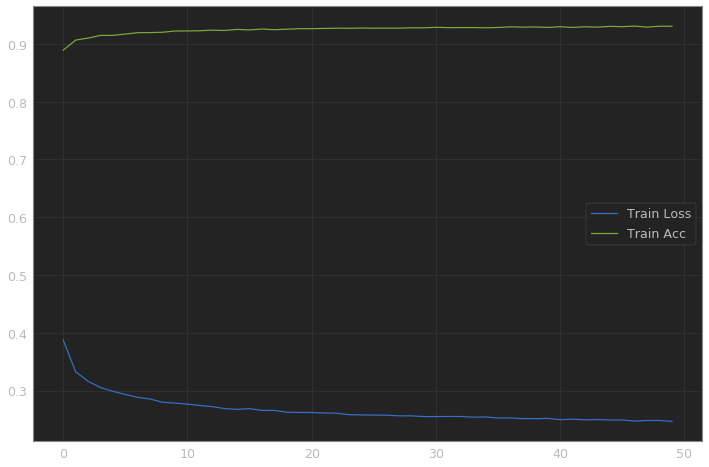

In [20]:
plt.plot(train_losses, label='Train Loss')
plt.plot(train_acc, label='Train Acc')
plt.legend()
plt.show()

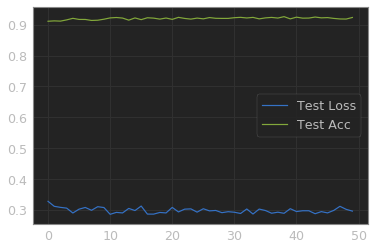

In [17]:
plt.plot(test_losses, label='Test Loss')
plt.plot(test_acc, label='Test Acc')
plt.legend()
plt.show()

In [22]:
torch.save(model.state_dict(), './ser/neural_network.pth')

In [23]:
del model
torch.cuda.empty_cache()